### Simulate RDD Data 

# Make some choices

Running this cell will define the variables of interest, our hyperparameters and some training options.

Make sure your Google Colab runtime has a GPU. You can turn this on via:

`Runtime -> Change Runtime type -> Hardware Accelerator -> GPU`

In [214]:
import wgan
import torch
import pandas as pd
from rdd import rdd
import numpy as np
import importlib
importlib.reload(wgan)
#assert torch.cuda.is_available()

#Generate X
cont1 = ["x"] 
# Y | X 
cont2 = ["y"] 
text2 = ["x"] 

# 

lbound1 = {"x": -1}
ubound1 = {"x": 1} 
lbound2 = {"y": 0}
ubound2 = {"y": 1}

# T | X 

### Lee data

In [55]:
df.drop(columns=["source"])

,x,y
0,0.104870,0.580962
1,0.139252,0.461058
2,-0.073602,0.543411
3,0.086821,0.584580
4,0.399358,0.580286
...,...,...
6553,0.524030,0.808786
6554,1.000000,1.000000
6555,1.000000,0.760513
6556,0.015699,0.271370


In [242]:
file = "../data/cleaned/lee.csv"
df = pd.read_csv(file)

dfa = df[df['x']>0].copy()
print(dfa.head())

dfb = df[df['x']<=0].copy()
#d= [64,64,64]
#dc=[128,128,128]
g_lr = 1e-4
c_lr = 1e-4
bsize = 64
opt = wgan.OAdam
g_opt = wgan.OAdam
cd = [128, 128, 128]
gd = [128, 128, 128]
factor = 5
noise = 2
dropout = 0.1
epochs = 2000
steps = 25 

#oadam/oadam with batch size of 64 worked not bad 

data_wrapper1 = wgan.DataWrapper(df, cont1, continuous_lower_bounds=lbound1,
                                              continuous_upper_bounds=ubound1)
x1,context1 = data_wrapper1.preprocess(df)
specs1 = wgan.Specifications(data_wrapper1,
                             batch_size=bsize,
                             max_epochs=epochs,
                             optimizer= torch.optim.Adam, 
                             generator_optimizer = wgan.OAdam, 
                             critic_lr=c_lr, 
                             generator_lr = g_lr, 
                             generator_d_noise = noise, 
                             critic_d_hidden = cd, 
                             generator_d_hidden = gd, 
                             critic_gp_factor = factor, 
                             generator_dropout = dropout, 
                             critic_steps = steps, 
                            print_every=100)
#generator1 = wgan.Generator(specs1)
#critic1 = wgan.Critic(specs1)


data_wrapper2a = wgan.DataWrapper(dfa, cont2, context_vars=text2, continuous_lower_bounds=lbound2,
                                              continuous_upper_bounds=ubound2)
x2a, context2a = data_wrapper2a.preprocess(dfa)
specs2a = wgan.Specifications(data_wrapper2a,
                              batch_size=bsize,
                              critic_steps=steps,
                              optimizer= torch.optim.Adam, 
                              generator_optimizer = wgan.OAdam, 
                              critic_lr = c_lr, 
                              generator_lr = g_lr, 
                              critic_d_hidden = cd, 
                              generator_d_hidden = gd, 
                              critic_gp_factor = factor, 
                              generator_d_noise = noise, 
                              generator_dropout = dropout, 
                              max_epochs=epochs, 
                              print_every=100) 
generator2a = wgan.Generator(specs2a)
critic2a = wgan.Critic(specs2a)


data_wrapper2b = wgan.DataWrapper(dfb, cont2, context_vars=text2, continuous_lower_bounds=lbound2,
                                      continuous_upper_bounds=ubound2)
x2b, context2b = data_wrapper2b.preprocess(dfb)
specifications2b = wgan.Specifications(data_wrapper2b,
                                       batch_size=bsize,
                                       critic_steps=steps,
                                       optimizer=torch.optim.Adam, 
                                       generator_optimizer=wgan.OAdam,
                                       critic_lr = c_lr, 
                                       generator_lr = g_lr, 
                                       critic_d_hidden = cd, 
                                       generator_d_hidden = gd, 
                                       critic_gp_factor = factor, 
                                       max_epochs = epochs, 
                                       generator_d_noise = noise, 
                                       generator_dropout= dropout, 
                                       print_every=100)
generator2b = wgan.Generator(specifications2b)
critic2b = wgan.Critic(specifications2b)

          x         y
0  0.104870  0.580962
1  0.139252  0.461058
3  0.086821  0.584580
4  0.399358  0.580286
5  0.168077  0.624352
settings: {'optimizer': <class 'torch.optim.adam.Adam'>, 'critic_d_hidden': [128, 128, 128], 'critic_dropout': 0, 'critic_steps': 25, 'critic_lr': 0.0001, 'critic_gp_factor': 5, 'generator_d_hidden': [128, 128, 128], 'generator_dropout': 0.1, 'generator_lr': 0.0001, 'generator_d_noise': 2, 'generator_optimizer': <class 'wgan.wgan.OAdam'>, 'max_epochs': 2000, 'batch_size': 64, 'test_set_size': 16, 'load_checkpoint': None, 'save_checkpoint': None, 'save_every': 100, 'print_every': 100, 'device': 'cpu'}
settings: {'optimizer': <class 'torch.optim.adam.Adam'>, 'critic_d_hidden': [128, 128, 128], 'critic_dropout': 0, 'critic_steps': 25, 'critic_lr': 0.0001, 'critic_gp_factor': 5, 'generator_d_hidden': [128, 128, 128], 'generator_dropout': 0.1, 'generator_lr': 0.0001, 'generator_d_noise': 2, 'generator_optimizer': <class 'wgan.wgan.OAdam'>, 'max_epochs': 2000, '

Run the next cell to train the models. You can abort at any time to continue with the evaluation.

In [243]:
# Option 1: train from scratch
wgan.train(generator1, critic1, x1, context1, specs1)
wgan.train(generator2a, critic2a, x2a, context2a, specs2a)
wgan.train(generator2b, critic2b, x2b, context2b, specifications2b)

epoch 0 | step 104 | WD_test 0.59 | WD_train 0.03 | sec passed 0 |
epoch 100 | step 10404 | WD_test -0.24 | WD_train 0.07 | sec passed 34 |
epoch 200 | step 20704 | WD_test 0.1 | WD_train -0.02 | sec passed 39 |
epoch 300 | step 31004 | WD_test 0.45 | WD_train 0.06 | sec passed 837 |
epoch 400 | step 41304 | WD_test -0.23 | WD_train 0.05 | sec passed 53 |
epoch 500 | step 51604 | WD_test -0.2 | WD_train 0.03 | sec passed 50 |
epoch 600 | step 61904 | WD_test 0.22 | WD_train 0.06 | sec passed 51 |
epoch 700 | step 72204 | WD_test 0.08 | WD_train 0.03 | sec passed 51 |
epoch 800 | step 82504 | WD_test 0.31 | WD_train 0.02 | sec passed 50 |
epoch 900 | step 92804 | WD_test -0.06 | WD_train 0.02 | sec passed 45 |
epoch 1000 | step 103104 | WD_test 0.01 | WD_train -0.02 | sec passed 44 |
epoch 1100 | step 113404 | WD_test 0.46 | WD_train 0.04 | sec passed 44 |
epoch 1200 | step 123704 | WD_test -0.07 | WD_train -0.02 | sec passed 43 |
epoch 1300 | step 134004 | WD_test 0.12 | WD_train -0.02

Alternatively, you can load our pre-trained parameters:

In [9]:
# Option 2: load trained model parameters
def load_saved_parameters(type):
  for model, name in zip([generator1, critic1,
                          generator2a, critic2a, 
                          generator2b, critic2b], 
                         ["G1","C1", "G2a","C2a", "G2b", "C2b"]):
      state_dict = torch.load("../trained_models/" + name + "_{}.pth".format(type))
      model.load_state_dict(state_dict)

load_saved_parameters("lee")

To get a simulated data frame, we use the `DataWrapper.apply_generator(generator, df)` method, which updates columns in `df` with data simulated from `generator` wherever possible. We can therefore chain multiple calls together to build up a fake dataframe from multiple (partial) generators.
Similarly, we can add a column with the values of the critic using the `DataWrapper.apply_critic(critic, df)` method.

We'll wrap everything into a function so that we can repeat later.

In [272]:
def get_ground_truth(): 
    df = pd.DataFrame(np.zeros((10000000, 2)), columns=['x', 'y'])
    dfa = data_wrapper2a.apply_generator(generator2a, df)
    dfb = data_wrapper2b.apply_generator(generator2b, df)
    print(dfa.head())
    print(dfb.head())
    return dfa['y'].mean() - dfb['y'].mean()

get_ground_truth()

     x         y
0  0.0  0.641352
1  0.0  0.491037
2  0.0  0.459640
3  0.0  0.389233
4  0.0  0.630577
     x         y
0  0.0  0.364484
1  0.0  0.364142
2  0.0  0.494236
3  0.0  0.344758
4  0.0  0.440789


0.07335597

In [235]:
def apply_models_to_data():
    s = df.sample(int(3e4),replace=True)
    s = data_wrapper1.apply_generator(generator1, s) 
   
    dfa = s[s['x']>0].copy()
    dfb = s[s['x']<=0].copy() 
    print(dfa.head())
    print(dfb.head())
    #first generate x 
    dfa = data_wrapper2a.apply_generator(generator2a, dfa)
    dfb = data_wrapper2b.apply_generator(generator2b, dfb)
    return pd.concat([dfa,dfb],axis=0,ignore_index=True)

          x         y
0  0.070297  0.673697
1  0.105010  0.796105
3  0.167131  0.326197
4  0.411104  0.494833
5  0.408603  0.196265
           x         y
2  -0.283673  0.597935
6  -0.031450  0.604752
7  -0.763853  0.347118
11 -0.236126  0.334024
14 -0.196777  0.428432


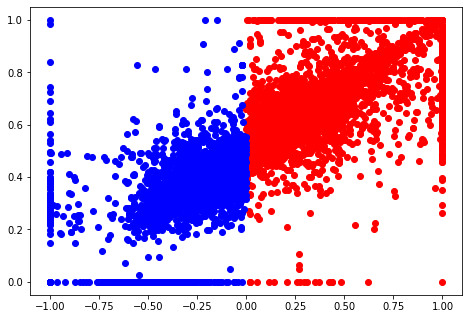

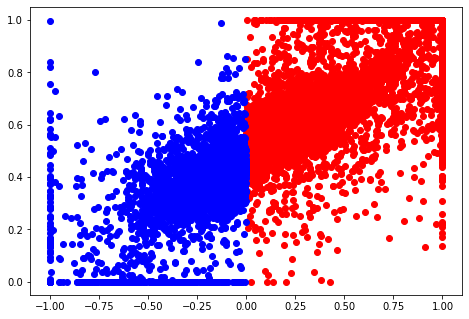

In [245]:
import matplotlib.pyplot as plt
df_fake = apply_models_to_data()
#print(rdd_estimate(df_fake)) 

fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfa['x'],dfa['y'], color='r')
ax.scatter(dfb['x'],dfb['y'], color='b')

fig2=plt.figure() 
ax=fig2.add_axes([0,0,1,1])
ax.scatter(df_fake.loc[df_fake['x']>0,'x'],df_fake.loc[df_fake['x']>0,'y'], color='r')
ax.scatter(df_fake.loc[df_fake['x']<=0,'x'],df_fake.loc[df_fake['x']<=0,'y'], color='b')

In [110]:
print(dfa['y'].mean())
print(dfb['y'].mean())

print(df_fake.loc[df_fake['x']>0,'y'].mean())
print(df_fake.loc[df_fake['x']<=0,'y'].mean())

0.6978809707176532
0.3465220178467153
0.81872016
0.48907354


In [261]:
def rdd_estimate(data):
    bandwidth_opt = rdd.optimal_bandwidth(data['y'], data['x'], cut=0) 
    data_rdd = rdd.truncated_data(data, 'x', bandwidth_opt, cut=0) 
    model = rdd.rdd(data_rdd, 'x', 'y', cut=0)
    return model.fit().params[1]

Finally, we can examine our generated data with the `compare_dfs` function.


In [264]:
df_fake.head

<bound method NDFrame.head of      source         x         y
0      fake  0.070297  0.542877
1      fake  0.105010  0.540387
2      fake  0.167131  0.552587
3      fake  0.411104  0.912086
4      fake  0.408603  0.824880
...     ...       ...       ...
9995   fake -0.161408  0.404145
9996   fake -0.037997  0.379935
9997   fake -0.029803  0.422341
9998   fake -0.096977  0.521137
9999   fake -0.276613  0.408682

[10000 rows x 3 columns]>

In [262]:
print("real:",rdd_estimate(df)) 
print("fake:",rdd_estimate(df_fake))

Estimation Equation:	 y ~ TREATED + x
real: 0.08522574425161498
Estimation Equation:	 y ~ TREATED + x
fake: 0.07138780500827026


In [246]:
def evaluate_results():
  # Let's print the att!
  print("--------------------RDD--------------------")
  #print("real:",rdd_estimate(df)) 
  #print("fake:",rdd_estimate(df_fake))

  # Now, we'll compare our fake data to the real data
  table_groupby = ["t"]
  scatterplot = dict(x= ["x"],
                     y= ["y"],
                     samples = 5000, smooth = 0)
  histogram = dict(variables=['x','y','x','y'],
                   nrow=2, ncol=2)
  wgan.compare_dfs(df, df_fake, figsize=5, histogram=histogram, scatterplot=scatterplot)


--------------------RDD--------------------
-------------comparison of means-------------
source  fake  real
x       0.16  0.13
y       0.55  0.55
-------------comparison of stds-------------
source  fake  real
x       0.44  0.46
y       0.23  0.24


/Users/evanmunro/.pyenv/versions/3.9.1/lib/python3.9/site-packages/wgan/wgan.py:670: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
/Users/evanmunro/.pyenv/versions/3.9.1/lib/python3.9/site-packages/wgan/wgan.py:702: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


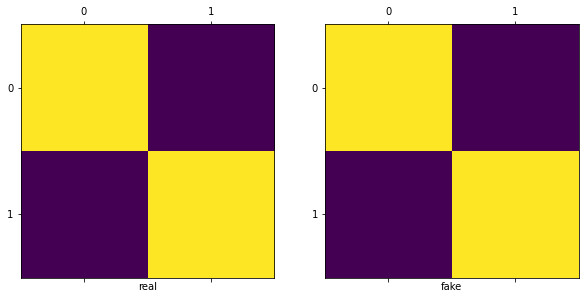

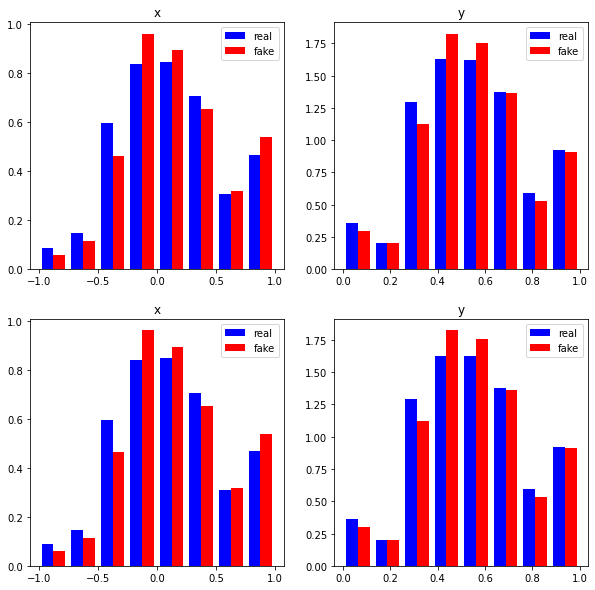

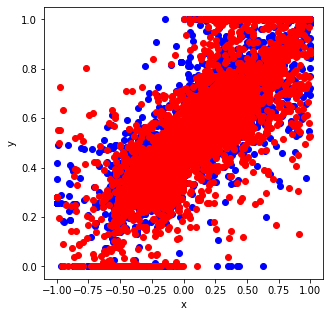

In [247]:
evaluate_results()

Looks good enough? Then save the models, generate a large dataframe and export it.

In [248]:
# save trained model parameters
def save_trained_parameters(type):
  #%mkdir trained_models
  for model, name in zip([generator1,critic1,generator2a,critic2a,generator2b,critic2b], ["G1","C1","G2a","C2a","G2b","C2b"]):
      torch.save(model.state_dict(), "../trained_models/" + name + "_{}.pth".format(type))

In [249]:
save_trained_parameters("lee")

In [267]:
# generate and save data of a certain sample size
def save_generated_data(type,n_samples):
    s = df.sample(int(n_samples),replace=True)
    s = data_wrapper1.apply_generator(generator1,s) 
    #print(s.head())
    dfa = s[s['x']>0]
    dfb = s[s['x']<0]
    #print(dfb.shape)
    #first generate x 
    dfa = data_wrapper2a.apply_generator(generator2a,dfa)
    dfb = data_wrapper2b.apply_generator(generator2b,dfb)
    df_fake = pd.concat([dfa,dfb],axis=0,ignore_index=True)
    df_fake.drop(columns=['source']).to_feather("../data/generated/{}_generated.feather".format(type))

In [273]:
save_generated_data("lee",int(1e7))